In [1]:
import numpy as np
import re
import csv
import os
from PIL import Image
import PIL
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import keras


In [2]:
file = open ("3DPes/archive/Label.txt")
lines = file.readlines()
lines = sorted(lines, key=lambda s: int(re.findall(r'\d+', s)[0]))

In [18]:

labels = np.empty(shape = len(lines))
labelnames = np.empty(shape = len(lines))

In [19]:
sub1 = "personalLess15"	
sub2 = "personalLess30"
sub3 = "personalLess45"		
sub4 = "personalLess60"	
sub5 = "personalLarger60"

for i in range (len(lines)):
    if sub1 in lines[i]:
        labels[i] = 0
    if sub2 in lines[i]:
        labels[i] = 1
    if sub3 in lines[i]:
        labels[i] = 2
    if sub4 in lines[i]:
        labels[i] = 3
    if sub5 in lines[i]:
        labels[i] = 4  

In [23]:
with open("3DPes/archive/Label.txt") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        labelnames[line_count] = row[0]
        line_count += 1
labelnames.sort()
print (labelnames)
print(labels)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  42.  43.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  61.  62.  63.  64.  65.  66.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 102. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 159. 161. 162. 163.
 164. 165. 166. 167. 168. 169. 170. 171. 172. 174. 175. 176. 178. 179.
 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193.
 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204.]
[2. 1. 1. 1. 4. 1. 3

In [24]:
dictionary = {}

for i in range (len(labels)):
    dictionary[int(labelnames[i])] = int(labels [i])
print(dictionary)

{1: 2, 2: 1, 3: 1, 4: 1, 5: 4, 6: 1, 7: 3, 8: 2, 9: 3, 10: 1, 11: 2, 12: 0, 13: 1, 14: 1, 15: 4, 16: 2, 17: 2, 18: 1, 19: 1, 20: 2, 21: 1, 22: 3, 23: 2, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 2, 32: 3, 33: 1, 34: 2, 35: 1, 36: 2, 37: 3, 38: 2, 39: 1, 40: 1, 42: 1, 43: 3, 45: 2, 46: 1, 47: 3, 48: 2, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 2, 56: 2, 57: 1, 58: 2, 59: 1, 61: 1, 62: 3, 63: 2, 64: 1, 65: 2, 66: 2, 68: 1, 69: 2, 70: 1, 71: 1, 72: 1, 73: 1, 74: 3, 75: 1, 76: 1, 77: 1, 78: 3, 79: 2, 80: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 2, 87: 1, 88: 3, 89: 1, 90: 1, 91: 1, 92: 2, 93: 1, 94: 1, 95: 1, 96: 3, 97: 3, 98: 1, 99: 2, 100: 1, 102: 1, 104: 2, 105: 2, 106: 2, 107: 2, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 2, 117: 1, 118: 2, 119: 1, 120: 2, 121: 1, 122: 2, 123: 1, 124: 2, 125: 2, 126: 2, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 2, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1

In [40]:
directory = "3DPes/archive"
imageset = os.listdir(directory)
imageset.pop(-1)
print(imageset)

['100_3_FRAME_26_RGB.bmp', '100_4_FRAME_185_RGB.bmp', '100_4_FRAME_70_RGB.bmp', '102_23_FRAME_12_RGB.bmp', '102_23_FRAME_54_RGB.bmp', '102_26_FRAME_85_RGB.bmp', '102_26_FRAME_87_RGB.bmp', '104_53_FRAME_103_RGB.bmp', '104_53_FRAME_70_RGB.bmp', '104_54_FRAME_19_RGB.bmp', '104_54_FRAME_70_RGB.bmp', '105_62_FRAME_27_RGB.bmp', '105_62_FRAME_51_RGB.bmp', '106_80_FRAME_119_RGB.bmp', '106_80_FRAME_99_RGB.bmp', '106_83_FRAME_72_RGB.bmp', '107_90_FRAME_35_RGB.bmp', '107_90_FRAME_62_RGB.bmp', '107_91_FRAME_24_RGB.bmp', '107_92_FRAME_91_RGB.bmp', '108_115_FRAME_162_RGB.bmp', '108_115_FRAME_32_RGB.bmp', '109_139_FRAME_173_RGB.bmp', '109_139_FRAME_47_RGB.bmp', '10_903_FRAME_150_RGB.bmp', '10_903_FRAME_195_RGB.bmp', '10_908_FRAME_372_RGB.bmp', '10_908_FRAME_488_RGB.bmp', '10_911_FRAME_266_RGB.bmp', '10_911_FRAME_86_RGB.bmp', '10_915_FRAME_26_RGB.bmp', '10_950_FRAME_36_RGB.bmp', '10_953_FRAME_134_RGB.bmp', '10_953_FRAME_160_RGB.bmp', '10_954_FRAME_29_RGB.bmp', '10_954_FRAME_45_RGB.bmp', '10_954_FRAME_

In [41]:
labelset = np.ndarray(shape = len(imageset))
for i in range (len(imageset)):
    index = imageset[i][:3]
    if index[2] == "_":
        index = index[:2]
    elif index[1] == "_":
        index = index[:1]
    labelset[i] = dictionary.get(int(index))
print(labelset)


[1. 1. 1. ... 3. 3. 3.]


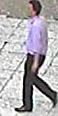

In [43]:
for i in range (len(imageset)):
    imageset[i] = os.path.join(directory, imageset[i])
PIL.Image.open(imageset[i])

In [8]:
folders = ["3DPeS/archive", "CAVIAR4REID/archive", "CUHK/archive", "GRID/archive", "i-LID/archive", "MIT/archive", "PRID/archive", "SARC3D/archive", "TownCentre/archive", "VIPeR/archive"]
fullimageset = []
fulllabelset = []

for directory in folders:
    labelfile = os.path.join(directory, "Label.txt")
    file = open (labelfile)
    lines = file.readlines()
    lines = sorted(lines, key=lambda s: int(re.findall(r'\d+', s)[0]))

    labels = np.ndarray(shape = len(lines))
    labelnames = np.empty(shape = len(lines))

    sub1 = "personalLess15"	
    sub2 = "personalLess30"
    sub3 = "personalLess45"		
    sub4 = "personalLess60"	
    sub5 = "personalLarger60"

    for i in range (len(lines)):
        if sub1 in lines[i]:
            labels[i] = 0
        if sub2 in lines[i]:
            labels[i] = 1
        if sub3 in lines[i]:
            labels[i] = 2
        if sub4 in lines[i]:
            labels[i] = 3
        if sub5 in lines[i]:
            labels[i] = 4

    with open(labelfile) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=' ')
        line_count = 0
        for row in csv_reader:
            if directory == "CUHK/archive":
                row[0] = row[0][:4]
            labelnames[line_count] = row[0]
            line_count += 1
    labelnames.sort()


    dictionary = {}

    for i in range (len(labels)):
        dictionary[int(labelnames[i])] = int(labels [i])



    imageset = os.listdir(directory)
    imageset.pop(-1)


    labelset = np.ndarray(shape = len(imageset))
    if directory == "TownCentre/archive" or directory == "3DPeS/archive":
        for i in range (len(imageset)):
            index = imageset[i][:3]
            if index[2] == "_":
                index = index[:2]
            elif index[1] == "_":
                index = index[:1]
            labelset[i] = dictionary.get(int(index))
    elif directory == "SARC3D/archive" or directory == "VIPeR/archive":
        for i in range (len(imageset)):
            index = imageset[i][:3]
            labelset[i] = dictionary.get(int(index))
    elif directory == "MIT/archive":
        for i in range (len(imageset)):
            index = imageset[i][:5]
            labelset[i] = dictionary.get(int(index))
    else:
        print
        for i in range (len(imageset)):
            index = imageset[i][:4]
            labelset[i] = dictionary.get(int(index))

    for i in range (len(imageset)):
        imageset[i] = os.path.join(directory, imageset[i])
        fullimageset.append(imageset[i])
        fulllabelset.append(labelset[i])





In [9]:
fifteen = 0
thirty = 0
fortyfive = 0
sixty = 0
sixtyplus = 0

for i in fulllabelset:
    if i == 0: fifteen +=1
    if i == 1: thirty +=1
    if i == 2: fortyfive +=1
    if i == 3: sixty +=1
    if i == 4: sixtyplus +=1

print(fifteen)
print(thirty)
print(fortyfive)
print(sixty)
print(sixtyplus)

197
9439
6247
1944
1172


In [5]:
joined = np.vstack((fullimageset,fulllabelset))
df = pd.DataFrame(joined, columns = ["Images", "Labels"])
print(df)

NameError: name 'pd' is not defined

In [17]:
for i in fullimageset:
    i = PIL.Image.open(i)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(fullimageset, fulllabelset, test_size=0.33, random_state=42)

In [22]:
print(X_train)
print(y_train)

['GRID/archive\\0271_2_25403_179_103_87_287.jpeg', 'CUHK/archive\\2909.png', 'PRID/archive\\0305_a.png', 'TownCentre/archive\\68_1540.jpg', 'TownCentre/archive\\68_1558.jpg', 'CUHK/archive\\2951.png', 'PRID/archive\\1248_b.png', 'CAVIAR4REID/archive\\0055_013.jpg', 'TownCentre/archive\\163_3231.jpg', 'GRID/archive\\0736_5_25725_179_13_62_168.jpeg', 'TownCentre/archive\\29_621.jpg', 'GRID/archive\\0194_5_38395_163_81_100_287.jpeg', 'MIT/archive\\00595_male_fore.jpg', 'CUHK/archive\\3978.png', 'CAVIAR4REID/archive\\0021_020.jpg', 'TownCentre/archive\\178_3680.jpg', 'CUHK/archive\\2931.png', 'i-LID/archive\\0029_005.jpg', '3DPeS/archive\\6_575_FRAME_75_RGB.bmp', 'TownCentre/archive\\121_2270.jpg', 'CUHK/archive\\1114.png', 'CUHK/archive\\2071.png', 'MIT/archive\\00237_female_fore.jpg', 'CUHK/archive\\1303.png', 'CUHK/archive\\0219.png', 'CAVIAR4REID/archive\\0012_004.jpg', 'CUHK/archive\\2670.png', 'TownCentre/archive\\45_994.jpg', 'CUHK/archive\\3706.png', 'GRID/archive\\0877_5_28078_191

In [23]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [24]:
#checking image size
im = PIL.Image.open(imageset[0])
im.size

(48, 128)

In [25]:
ptmodel = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(48, 128, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

In [29]:
inputs = ptmodel.input
x = tf.keras.layers.Dense(128, activation='relu')(ptmodel.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
#model = tf.keras.Model(inputs, outputs)
model = keras.Sequential([
      keras.Input(shape=[], dtype = tf.string),
      keras.layers.Dense(1, activation = "sigmoid")
    ])

print(model.summary())

ValueError: Input 0 of layer "dense_12" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x= X_train, y = y_train, epochs=25)

Epoch 1/25


ValueError: in user code:

    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_1' (type Functional).
    
    Input 0 of layer "conv1_pad" is incompatible with the layer: expected ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'model_1' (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None
